# The simplest tree

Let’s build the simplest tree model we can think of: a classification tree with only one split. Decision trees of this form are commonly referred to under the umbrella term Classification and Regression Trees (CART) [1]. For this initial investigation, we'll be attempting to predict patient mortality using only the `age` and `acutephysiologyscore` features.

While we will only be looking at classification here, regression isn’t too different. After grouping the data (which is essentially what a decision tree does), classification involves assigning all members of the group to the majority class of that group during training. Regression is the same, except you would assign the average value, not the majority.

In the case of a decision tree with one split, often called a “stump”, the model will partition the data into two groups, and assign classes for those two groups based on majority vote. There are many parameters available for the `DecisionTreeClassifier` class; by specifying `max_depth=1` we will build a decision tree with only one split - i.e. of depth 1.

As this is a simple decision tree, we will use the tree module of the `sklearn` Python package. Later on in the workshop we will move onto more advanced techniques from different libraries. 

[1] L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984.

Let's begin by loading our processed data and re-creating our train/test splits from the previous workbook.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('eicu_processed.csv')

outcome = 'actualhospitalmortality'

# For this study, we only want age and acutephysiologyscore
features = ['age', 'acutephysiologyscore']

x = data[features]
y = data[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)

Create our tree:

In [3]:
from sklearn import tree

# specify max_depth=1 so we train a stump, i.e. a tree with only 1 split
model = tree.DecisionTreeClassifier(max_depth=1)

# fit the model to the data - trying to predict y from X
model = model.fit(x_train, y_train)

Because our tree is a stump, and we only have two predictor variables, we can easily visualise it.

[Text(0.5, 0.75, 'acutephysiologyscore <= 78.5\ngini = 0.174\nsamples = 375\nvalue = [339, 36]'),
 Text(0.25, 0.25, 'gini = 0.117\nsamples = 351\nvalue = [329, 22]'),
 Text(0.75, 0.25, 'gini = 0.486\nsamples = 24\nvalue = [10, 14]')]

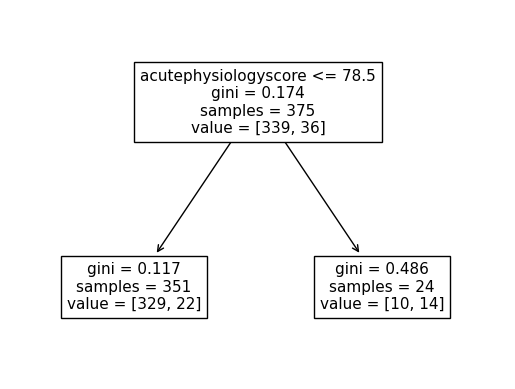

In [4]:
tree.plot_tree(model, feature_names=features)

Here we see three nodes: a node at the top, a node in the lower left, and a node in the lower right.

The top node is the root of the tree: it contains all the data. Let’s read this node bottom to top:

- `value = [339, 36]`: Current class balance. There are 339 observations of class 0 and 36 observations of class 1.
samples = 375: Number of samples assessed at this node.
- `gini = 0.174`: Gini impurity, a measure of “impurity”. The higher the value, the bigger the mix of classes. A 50/50 split of two classes would result in an index of 0.5.
- `acutePhysiologyScore <=78.5`: Decision rule learned by the node. In this case, patients with a score of <= 78.5 are moved into the left node and >78.5 to the right.

The gini impurity is actually used by the algorithm to determine a split. The model evaluates every feature (in our case, age and score) at every possible split (46, 47, 48..) to find the point with the lowest gini impurity in two resulting nodes.

The approach is referred to as “greedy” because we are choosing the optimal split given our current state. Let’s take a closer look at our decision boundary.

/home/matthew/intro-to-trees/utils.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


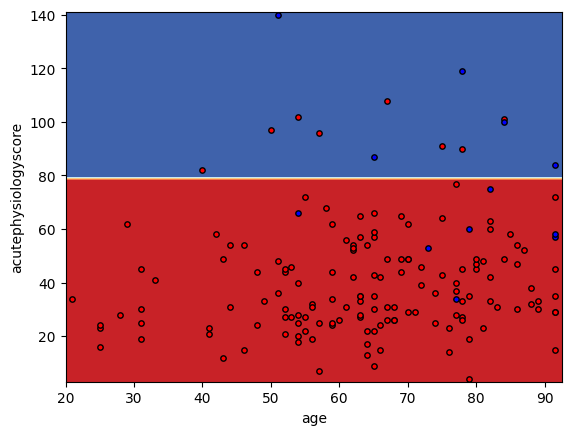

In [6]:
from utils import plot_tree_boundaries

# This is a custom function for this workshop that displays simple decision trees
plot_tree_boundaries(model, x_test, y_test, features, ['Alive', 'Dead'])

In this plot we can see the decision boundary on the y-axis, separating the predicted classes. The true classes are indicated at each point. Where the background and point colours are mismatched, there has been misclassification. Of course we are using a very simple model.

Throughout the few workbooks, we'll be looking at different types of decision trees, all of which are implemented in the `sklearn` Python package. Take some time to familiarise yourself with the [documentation](https://scikit-learn.org/stable/modules/tree.html) - in future workbooks, you'll have the chance to try to implement the models yourself before looking at the solutions.